#### Pyber challenge
#### Colin Brineman, M.A.

# Import and merge Pyber data

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import Matplotlib and Pandas
import matplotlib.pyplot as plt
import pandas as pd

# Set variables for csv data files
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read csv data files as DataFrames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Merge PyBer city data and ride data
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Analyze PyBer data

## Summarize data

### Calculate summary statistics

In [2]:
# Group by city type and calculate total rides
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

# Group by city type and calculate total drivers
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]

# Group by city type and calculate total fares
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

# Calculate average far per ride by city type
average_fare_per_ride = total_fares / total_rides

# Calculate average far per driver by city type
average_fare_per_driver = total_fares / total_drivers

### Create summary DataFrame

In [3]:
# Set DataFrame columns
pyber_summary_df = pd.DataFrame(
    {"Total Rides": total_rides,
     "Total Drivers": total_drivers,
     "Total Fares": total_fares,
     "Average Fares per Ride": average_fare_per_ride,
     "Average Fares per Driver": average_fare_per_driver})

# Remove DataFrame index
pyber_summary_df.index.name = None

# Format DataFrame columns
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fares per Ride"] = pyber_summary_df["Average Fares per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fares per Driver"] = pyber_summary_df["Average Fares per Driver"].map("${:,.2f}".format)

# Display DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fares per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


# Visualize PyBer data

## Explore grouped data

In [4]:
# Set new indices for PyBer DataFrame
pyber_data_df = pyber_data_df.set_index(["type", "date"])

# Display DataFrame
pyber_data_df

city   fare        ride_id  \
type  date                                                            
Urban 2019-01-14 10:14:22  Lake Jonathanshire  13.83  5739410935873   
      2019-03-04 18:24:09  South Michelleport  30.24  2343912425577   
      2019-02-24 04:29:00  Port Samanthamouth  33.44  2005065760003   
      2019-02-10 23:22:03          Rodneyfort  23.44  5149245426178   
      2019-03-06 04:28:35          South Jack  34.58  3908451377344   
...                                       ...    ...            ...   
Rural 2019-04-29 17:04:39         Michaelberg  13.38  8550365057598   
      2019-01-30 00:05:47     Lake Latoyabury  20.76  9018727594352   
      2019-02-10 21:03:50         North Jaime  11.11  2781339863778   
      2019-05-07 19:22:15        West Heather  44.94  4256853490277   
      2019-04-25 10:20:13          Newtonview  55.84  9990581345298   

                           driver_count  
type  date                               
Urban 2019-01-14 10:14:22             5  
      2019-03-04 18:24:09            72  
      2019-02-24 04:29:00            57  
      2019-02-10 23:22:03            34  
      2019-03-06 04:28:35            46  
...                                 ...  
Rural 2019-04-29 17:04:39             6  
      2019-01-30 00:05:47             2  
      2019-02-10 21:03:50             1  
      2019-05-07 19:22:15             4  
      2019-04-25 10:20:13             1  

[2375 rows x 4 columns]

In [5]:
# Group by type and date and calculate total fares
pyber_data_grouped = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

# Display DataFrame
pyber_data_grouped

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [6]:
# Reset PyBer DataFrame index
pyber_data_df = pyber_data_df.reset_index()

## Create pivot table

In [7]:
# Set pivot table index, columns, and values
pyber_pivot_table = pd.pivot(pyber_data_df, index="date", columns="type", values="fare")

# Display pivot table
pyber_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [8]:
# Filter pivot table by date
pyber_pivot_table = pyber_pivot_table.loc['2019-01-01':'2019-04-29']

# Display pivot table
pyber_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [9]:
# Set pivot table index data type to datetime
pyber_pivot_table.index = pd.to_datetime(pyber_pivot_table.index)

# Display pivot table datatypes
pyber_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [10]:
# Resample pivot table by week
pyber_pivot_table = pyber_pivot_table.resample('W').sum()

# Display pivot table
pyber_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Plot pivot table

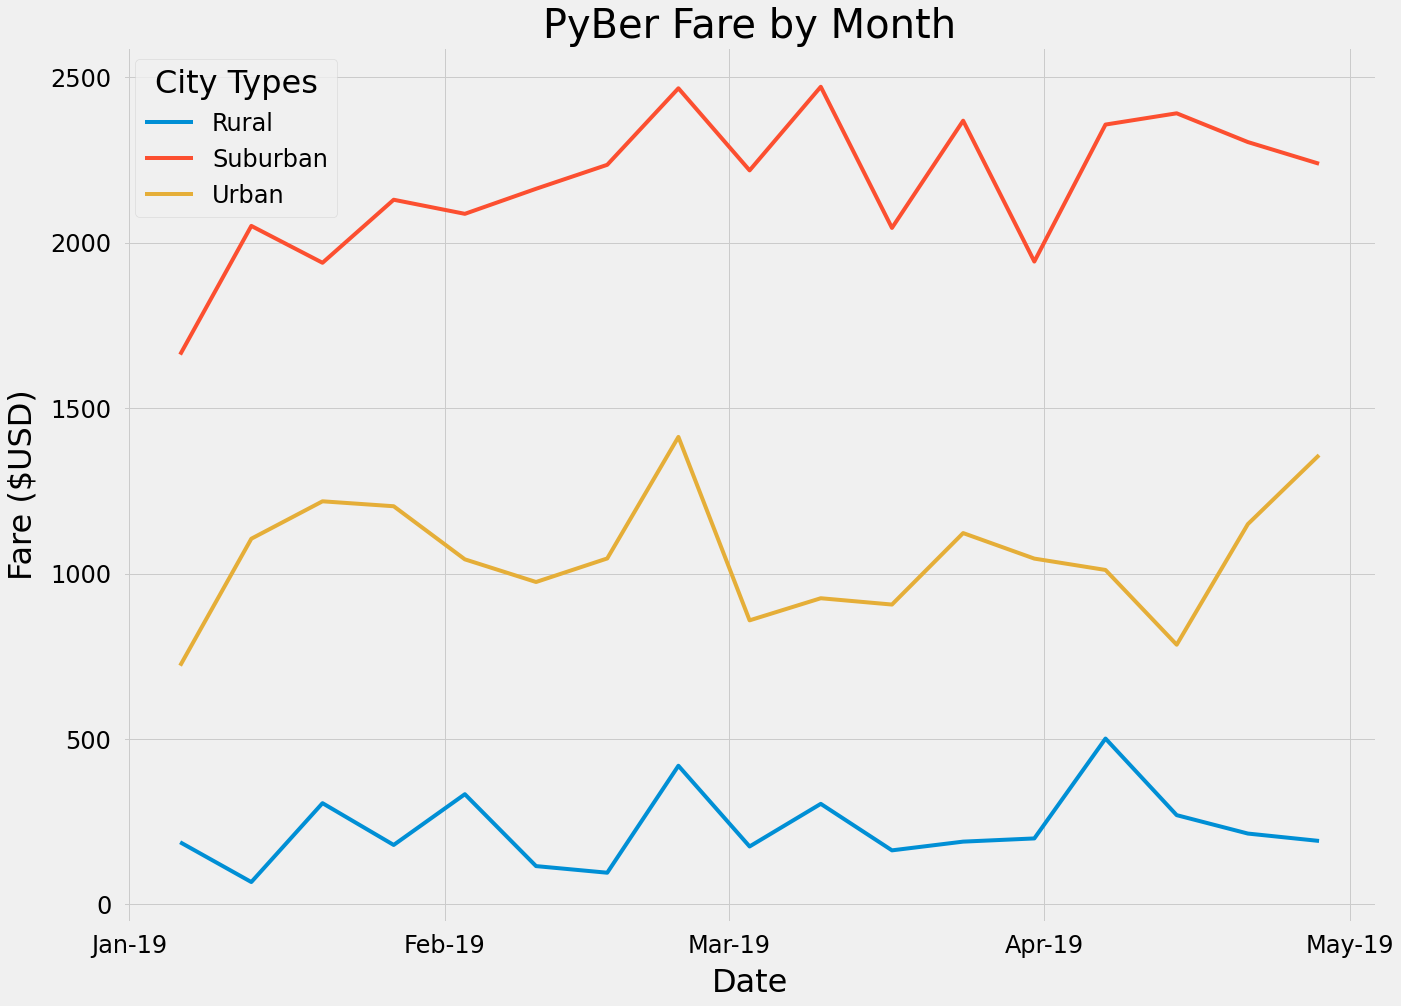

In [11]:
# Import dates from Matplotlib
import matplotlib.dates as mdates

# Import style from Matplotlib.
from matplotlib import style

# Set style to FiveThirtyEight
style.use('fivethirtyeight')

# Create plot data variables
date = pyber_pivot_table.index
rural = pyber_pivot_table["Rural"]
suburban = pyber_pivot_table["Urban"]
urban = pyber_pivot_table["Suburban"]

# Set figure size and define plot data
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(date, rural, label='Rural')
ax.plot(date, suburban, label='Suburban')
ax.plot(date, urban, label='Urban')

# Format plot title, axes, and legend
ax.set_title('PyBer Fare by Month', fontsize=40)
ax.set_xlabel('Date', fontsize=32, labelpad=10)
ax.set_ylabel('Fare ($USD)', fontsize=32, labelpad=12)
ax.tick_params(axis='both', labelsize=24, pad=12)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))
ax.legend(fontsize=24,loc="upper left",title="City Types").get_title().set_fontsize(32)

# Export plot as png file
plt.savefig("analysis/PyBer_fare_summary.png",
           dpi=150,
           bbox_inches='tight',
           pad_inches=0.5)